# Resnet-50

Resnet50 is a DL architecture which is useful for resolving **vanishing gradient** probrem.ResNet tends to perform better when you have a relatively large dataset or complex features. You can also use resnet for transfer learning to classify data for whom you do NOT have enough data.

In [76]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL
from tensorflow import keras

In [77]:
data_dir = '/kaggle/input/sports-balls-multiclass-image-classification/train'


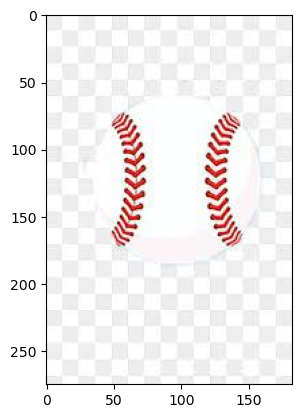

In [78]:
import cv2
example=cv2.imread('/kaggle/input/sports-balls-multiclass-image-classification/train/baseball/baseball_10.jpg')
example = cv2.cvtColor(example, cv2.COLOR_BGR2RGB)
plt.imshow(example)

In [79]:
example.shape

(275, 183, 3)

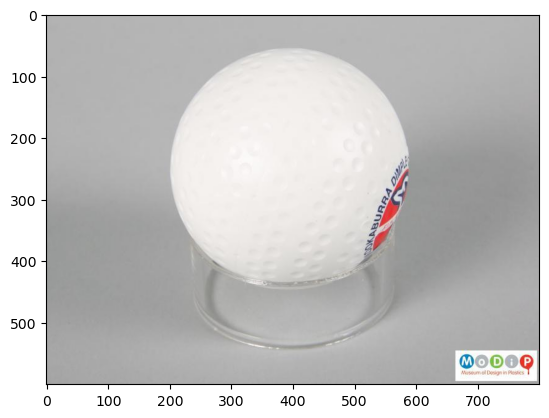

In [80]:
example=cv2.imread('/kaggle/input/sports-balls-multiclass-image-classification/train/hockey_ball/hockey_ball_1010.jpg')
example = cv2.cvtColor(example, cv2.COLOR_BGR2RGB)
plt.imshow(example)

In [81]:
example.shape

(600, 800, 3)

In [82]:

from tensorflow.keras.utils import image_dataset_from_directory
#train_data=image_dataset_from_directory(data_dir)
image_height = 256
batch_size=32
train_ds = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=3,
  image_size=(image_height, image_height),
  batch_size=batch_size)

Found 7328 files belonging to 15 classes.
Using 5863 files for training.


In [83]:
class_names = train_ds.class_names

len(class_names)

15

In [84]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [85]:
val_ds = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=3,
  image_size=(image_height, image_height),
  batch_size=batch_size)

Found 7328 files belonging to 15 classes.
Using 1465 files for validation.


In [87]:
from keras.applications import ResNet50
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Activation, Flatten, Dense

resnet_model = Sequential()

pretrained_model= ResNet50(include_top=False,
                   input_shape=(256,256,3),
                   pooling='avg',
                   classes=15,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(15, activation='softmax'))

Here, we have set the weights as imagenet is specifying which set of pre-trained weights to use for the ResNet50 model. ResNet50 was originally trained on a large-scale image classification task called ImageNet, which consists of millions of labeled images belonging to thousands of different classes.

In [92]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [93]:
resnet_model.summary()


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_15 (Flatten)        (None, 2048)              0         
                                                                 
 dense_28 (Dense)            (None, 512)               1049088   
                                                                 
 dense_29 (Dense)            (None, 15)                7695      
                                                                 
Total params: 24,644,495
Trainable params: 1,056,783
Non-trainable params: 23,587,712
_________________________________________________________________


In [100]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data = val_ds,  
  epochs=epochs
)

Epoch 1/10
184/184 [==============================] - 27s 145ms/step - loss: 0.0132 - accuracy: 0.9985 - val_loss: 0.7488 - val_accuracy: 0.8300
Epoch 2/10
184/184 [==============================] - 25s 131ms/step - loss: 0.0978 - accuracy: 0.9695 - val_loss: 0.9519 - val_accuracy: 0.7932
Epoch 3/10
184/184 [==============================] - 25s 132ms/step - loss: 0.1519 - accuracy: 0.9500 - val_loss: 0.8334 - val_accuracy: 0.8123
Epoch 4/10
184/184 [==============================] - 25s 130ms/step - loss: 0.1044 - accuracy: 0.9628 - val_loss: 1.0031 - val_accuracy: 0.8061
Epoch 5/10
184/184 [==============================] - 24s 129ms/step - loss: 0.0567 - accuracy: 0.9811 - val_loss: 0.8273 - val_accuracy: 0.8348
Epoch 6/10
184/184 [==============================] - 26s 136ms/step - loss: 0.0211 - accuracy: 0.9945 - val_loss: 0.8528 - val_accuracy: 0.8389
Epoch 7/10
184/184 [==============================] - 24s 127ms/step - loss: 0.0355 - accuracy: 0.9893 - val_loss: 0.9006 - val_ac

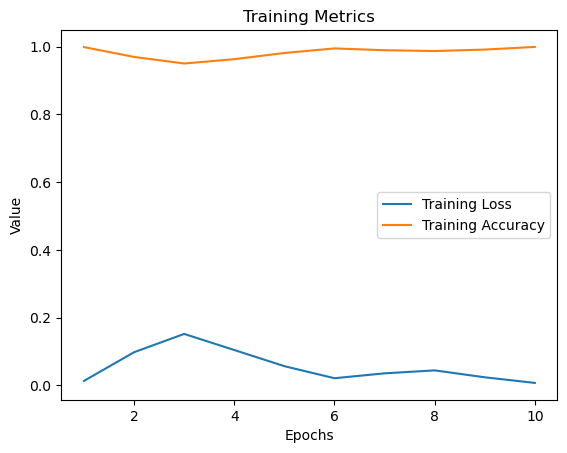

In [101]:
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.title('Training Metrics')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

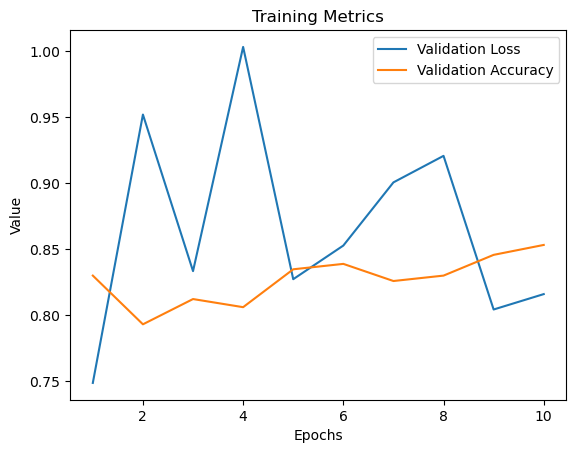

In [102]:
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.title('Training Metrics')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()


In [105]:
def predict_img(fpath):
    
    image=cv2.imread(fpath)
    example = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(example)
    image_resized= cv2.resize(image, (image_height,image_height))
    image=np.expand_dims(image_resized,axis=0)
    pred=resnet_model.predict(image)
    output=class_names[np.argmax(pred)]
    print(output)

Now let us look at the predictions for test images!

1/1 [==============================] - 0s 24ms/step
bowling_ball


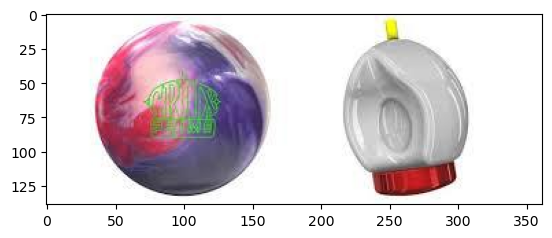

In [106]:
predict_img('/kaggle/input/sports-balls-multiclass-image-classification/test/bowling_ball/bowling_ball_146.jpg')

1/1 [==============================] - 0s 25ms/step
volleyball


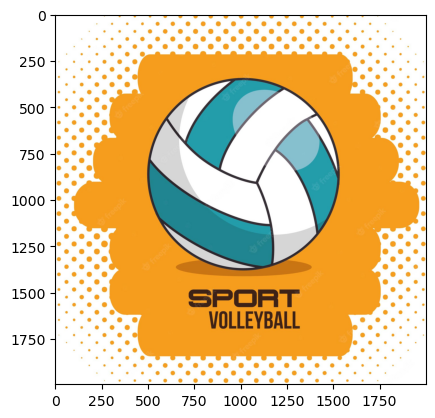

In [109]:
predict_img('/kaggle/input/sports-balls-multiclass-image-classification/test/volleyball/volleyball_140.jpg')

1/1 [==============================] - 0s 27ms/step
shuttlecock


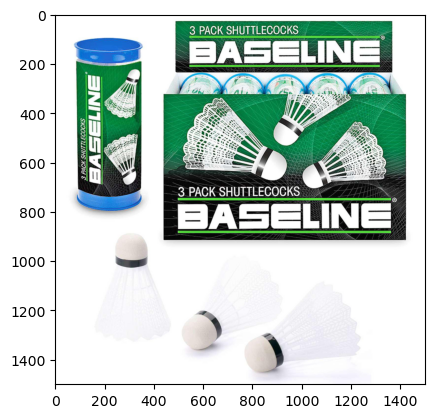

In [110]:
predict_img('/kaggle/input/sports-balls-multiclass-image-classification/test/shuttlecock/shuttlecock_119.jpg')